# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

Let's start defining the parameters of an ideal linear function which we are going to predict through a neural network regression

In [10]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [11]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.2 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

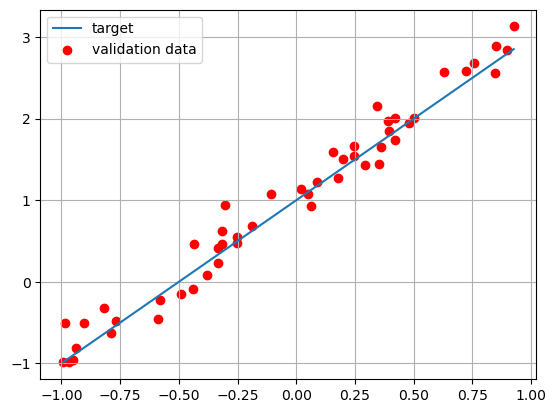

In [12]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [13]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

/home/davide/miniconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# get a summary of our composed model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

In [6]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 4.7711 - mse: 4.7711 - val_loss: 3.5252 - val_mse: 3.5252
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.6985 - mse: 3.6985 - val_loss: 2.7295 - val_mse: 2.7295
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.8668 - mse: 2.8668 - val_loss: 2.1481 - val_mse: 2.1481
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.2064 - mse: 2.2064 - val_loss: 1.7017 - val_mse: 1.7017
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.7796 - mse: 1.7796 - val_loss: 1.3591 - val_mse: 1.3591
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.4263 - mse: 1.4263 - val_loss: 1.0905 - val_mse: 1.0905
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.1685 - mse: 1.1685 - val_loss: 0.8778 - val_mse: 0.8778
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.9354 - mse: 0.9354 - val_loss: 0.7118 - val_mse: 0.7118
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7083 - mse: 0.

By looking at weights and biases we can see if the linear fit was successfull: $w_1$ represents the angular coefficient, $b$ the intercept.

In [7]:
# return weights and biases
model.get_weights()

[array([[1.8891144]], dtype=float32), array([0.9765007], dtype=float32)]

In [8]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0458 - mse: 0.0458 

Test loss: 0.04834529012441635
Test accuracy: 0.04834529012441635


In [9]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0036 - mse: 0.0036 

Test loss: 0.004201626870781183
Test accuracy: 0.004201626870781183


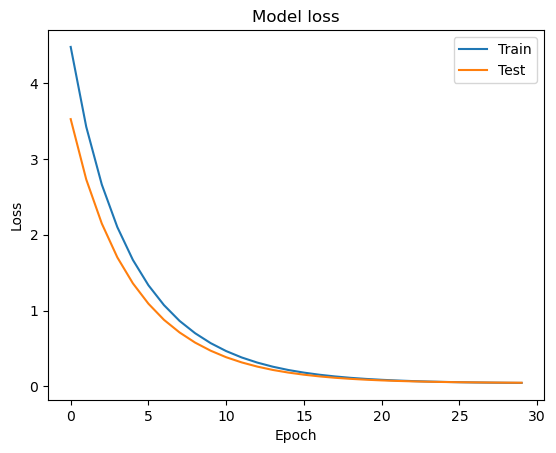

In [10]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


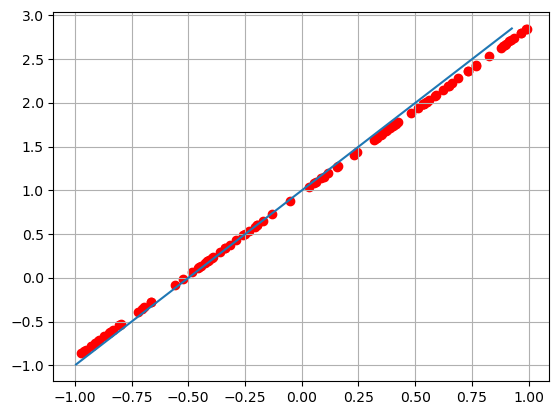

In [11]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

In [15]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Raddoppio i dati di training e aumento il rumore gaussiano da 0.2 a 0.5 per vedere se l'aumento di statistica basta a contrastare l'aumento del rumore.

In [16]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.5 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

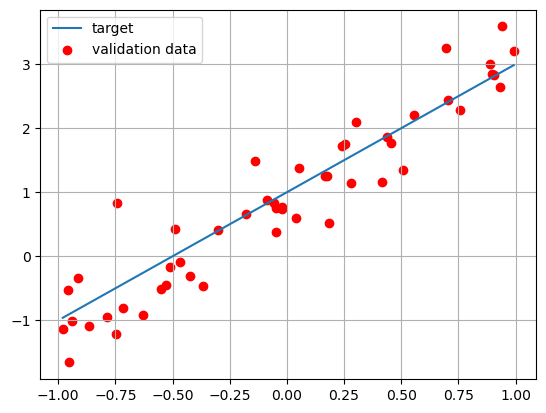

In [17]:
# plot validation and target dataset
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# compose the NN model
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [19]:
# get a summary of our composed model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Aumento anche le epoche da 30 a 50.

In [20]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 3.8928 - mse: 3.8928 - val_loss: 2.8803 - val_mse: 2.8803
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.3449 - mse: 2.3449 - val_loss: 1.9151 - val_mse: 1.9151
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5844 - mse: 1.5844 - val_loss: 1.3333 - val_mse: 1.3333
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.1305 - mse: 1.1305 - val_loss: 0.9681 - val_mse: 0.9681
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.7726 - mse: 0.7726 - val_loss: 0.7221 - val_mse: 0.7221
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5760 - mse: 0.5760 - val_loss: 0.5638 - val_mse: 0.5638
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4662 - mse: 0.4662 - val_loss: 0.4531 - val_mse: 0.4531
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3844 - mse: 0.3844 - val_loss: 0.3794 - val_mse: 0.3794
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3240 - 

In [21]:
# return weights and biases
model.get_weights()

[array([[1.9800556]], dtype=float32), array([1.0129312], dtype=float32)]

In [22]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2189 - mse: 0.2189  

Test loss: 0.20997563004493713
Test accuracy: 0.20997563004493713


In [23]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.8304e-04 - mse: 3.8304e-04 

Test loss: 0.00032683619065210223
Test accuracy: 0.00032683619065210223


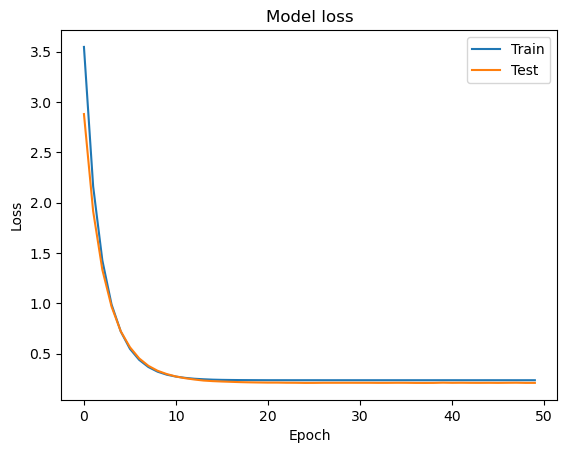

In [24]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


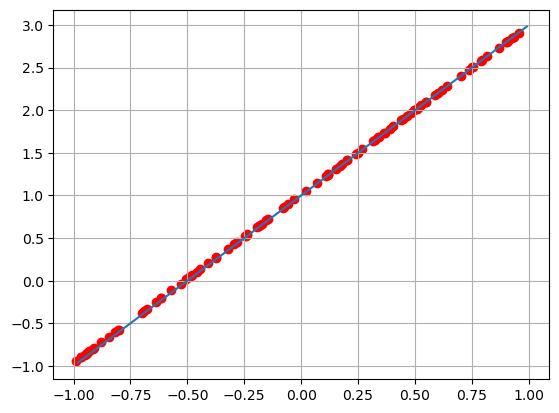

In [25]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

Soprattutto l'aumento di epoche credo abbia aumentato di molto l'efficienza del modello portando a un fit migliore del precedente nonostante il maggior rumore sui dati di input.

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

In [59]:
# target parameters of f(x) = a*x^3 + b*x^2 + c*x + d
def f(x, a = 3, b = -2, c = -3, d = 4):
    return a*x**3 + b*x**2 + c*x + d

In [60]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = f(x_valid) # ideal (target) linear function

sigma = 0.2 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(f(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(f(x_valid), sigma)

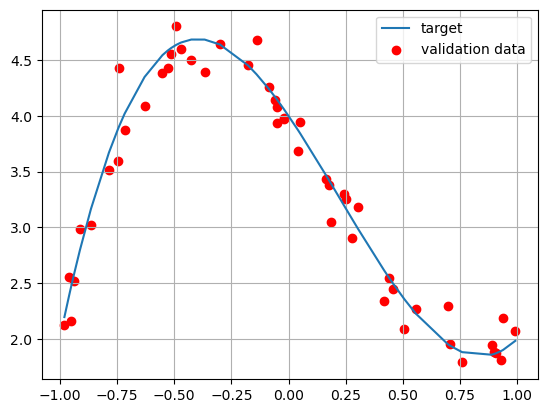

In [61]:
# plot validation and target dataset
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [73]:
# compose the NN model
model = tf.keras.Sequential()
model.add(Dense(64, input_shape=(1,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [74]:
# get a summary of our composed model
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,241 (8.75 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 11.5307 - mse: 11.5307 - val_loss: 8.8092 - val_mse: 8.8092
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.4095 - mse: 8.4095 - val_loss: 4.6106 - val_mse: 4.6106
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.8112 - mse: 3.8112 - val_loss: 1.4365 - val_mse: 1.4365
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.2322 - mse: 1.2322 - val_loss: 1.1933 - val_mse: 1.1933
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.9007 - mse: 0.9007 - val_loss: 0.9434 - val_mse: 0.9434
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.7308 - mse: 0.7308 - val_loss: 0.7823 - val_mse: 0.7823
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.6135 - mse: 0.6135 - val_loss: 0.6778 - val_mse: 0.6778
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5134 - mse: 0.5134 - val_loss: 0.5652 - val_mse: 0.5652
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4162 

In [76]:
# return weights and biases
model.get_weights()

[array([[-2.54325032e-01, -3.22236687e-01, -6.32413700e-02,
          1.65893614e-01,  4.45176708e-03, -2.67903805e-01,
          2.46826708e-01, -3.66622657e-02, -2.79664695e-01,
          2.58479953e-01,  4.37016636e-01, -9.89438742e-02,
          2.11746544e-01, -4.09703285e-01, -8.68215486e-02,
          1.92723945e-01,  1.99913368e-01,  2.58826055e-02,
         -3.19372058e-01, -2.39597455e-01,  1.88954994e-02,
         -1.33616731e-01, -1.53053835e-01,  2.34580845e-01,
          1.98540092e-01, -6.79160655e-02,  3.30473065e-01,
         -2.04807788e-01, -2.16533095e-01,  3.18181723e-01,
         -5.16062882e-03,  4.54658926e-01, -1.34516418e-01,
         -5.55516512e-04,  2.19602987e-01, -1.40393257e-01,
         -1.29395768e-01,  2.08965778e-01,  1.90477625e-01,
         -1.13053441e-01, -1.19056076e-01, -7.12620169e-02,
          3.41782288e-04, -7.19615966e-02,  2.13338628e-01,
         -2.09582314e-01, -9.75645259e-02,  1.47961468e-01,
          1.75411716e-01, -1.16866969e-0

In [77]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0438 - mse: 0.0438 

Test loss: 0.04226202890276909
Test accuracy: 0.04226202890276909


In [78]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0049 - mse: 0.0049  

Test loss: 0.005093257408589125
Test accuracy: 0.005093257408589125


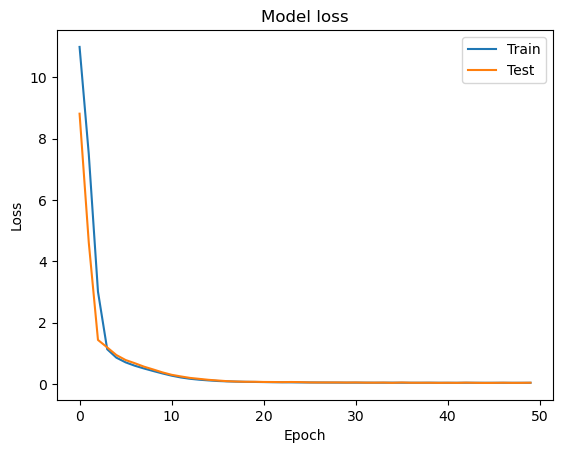

In [79]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


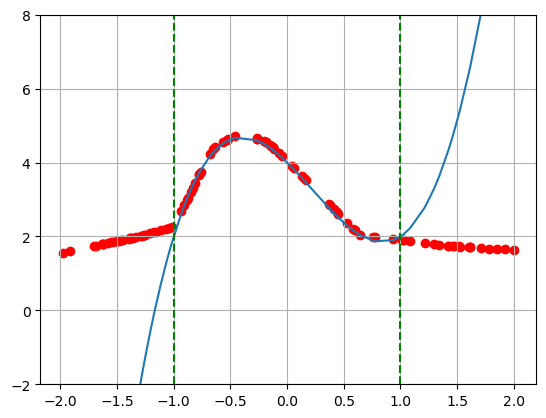

In [80]:
x_predicted = np.random.uniform(-2, 2, 100)
x_predicted.sort()
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
y_target_ext = f(x_predicted)
plt.plot(x_predicted, y_target_ext, label = "Target function\n $f(x) = 3x^3 - 2x^2 - 3x + 4$")
plt.axvline(1., color = 'g', linestyle = '--')
plt.axvline(-1., color = 'g', linestyle = '--')
plt.ylim(-2, 8)

plt.grid(True)
plt.show()

Il mio modello predice molto bene all'interno dell'intervallo [-1,1], ovvero dove sono stati generati i dati di validation, all'esterno invece non predice bene la mia funzione.

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

Aumento la dimensione dei miei dati di input rendendoli coppie di numeri.

In [99]:
def f(x,y):
    return np.sin(x**2 + y**2)

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1.5, 1.5, 10000)  # Generating 10000 random (x, y) pairs
y_train = np.random.uniform(-1.5, 1.5, 10000)
x_valid = np.random.uniform(-1.5, 1.5, 1000)   # Generating 1000 random (x, y) pairs for validation
y_valid = np.random.uniform(-1.5, 1.5, 1000)
z_target = f(x_valid, y_valid)  # Ideal (target) function values for validation data

sigma = 0.2  # Noise standard deviation, for now it is absent
z_train = np.random.normal(f(x_train, y_train), sigma)  # Actual measures from which we want to guess regression parameters for training data
z_valid = np.random.normal(f(x_valid, y_valid), sigma)  # Actual measures from which we want to guess regression parameters for validation data

XY_train = np.column_stack((x_train,y_train))
XY_valid = np.column_stack((x_valid,y_valid))

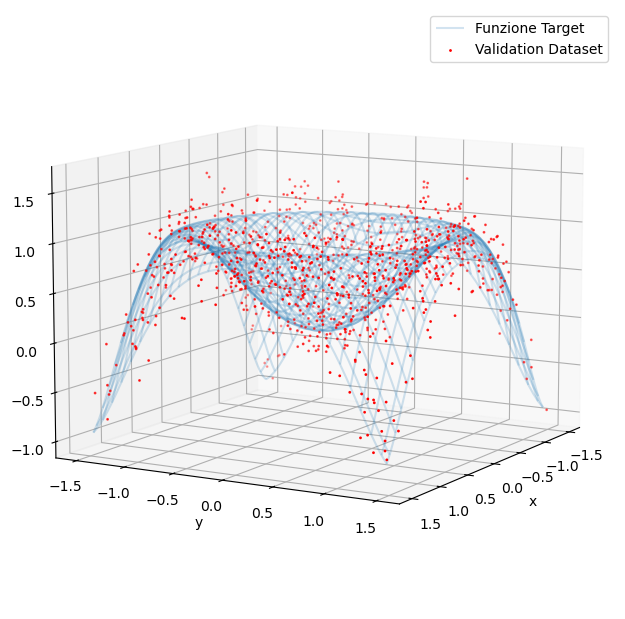

In [112]:
from mpl_toolkits.mplot3d import Axes3D

# Plotting target and validation dataset
fig = plt.figure(figsize = (6, 6))
ax = Axes3D(fig)
fig.add_axes(ax)
x_surf = np.arange(-3./2., 3./2., 0.05)
y_surf = np.arange(-3./2., 3./2., 0.05)
X_surf, Y_surf = np.meshgrid(x_surf,y_surf)
ax.plot_wireframe(X_surf, Y_surf, f(X_surf, Y_surf), label = 'Funzione Target', alpha = 0.2)
ax.scatter(x_valid, y_valid, z_valid, color='r', label='Validation Dataset', s=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f')
ax.legend()
ax.view_init(10, 30)
plt.show()

Aumento a 2 la input_shape.

In [101]:
# compose the NN model
model = tf.keras.Sequential()
model.add(Dense(64, input_shape=(2,), activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(1, activation='tanh'))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

/home/davide/miniconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [102]:
# get a summary of our composed model
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,305 (9.00 KB)

 Trainable params: 2,305 (9.00 KB)

 Non-trainable params: 0 (0.00 B)

In [104]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=XY_train, y=z_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(XY_valid, z_valid))

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1944 - mse: 0.1944 - val_loss: 0.1871 - val_mse: 0.1871
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.1963 - mse: 0.1963 - val_loss: 0.1871 - val_mse: 0.1871
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1903 - mse: 0.1903 - val_loss: 0.1925 - val_mse: 0.1925
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1935 - mse: 0.1935 - val_loss: 0.1847 - val_mse: 0.1847
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1892 - mse: 0.1892 - val_loss: 0.1863 - val_mse: 0.1863
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1936 - mse: 0.1936 - val_loss: 0.1855 - val_mse: 0.1855
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1917 - mse: 0.1917 - val_loss: 0.1855 - val_mse: 0.1855
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1916 - mse: 0.1916 - val_loss: 0.1824 - val_mse: 0.1824
Epoch 9/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - lo

In [105]:
# return weights and biases
model.get_weights()

[array([[ 0.16021389,  0.3046188 , -0.05898488,  0.06187056,  0.34553787,
         -0.01233149,  0.60201335, -0.6084506 ,  0.07396402, -0.01115659,
         -0.0801398 , -0.22060697,  0.12940243, -0.1338074 , -0.43453646,
         -0.44757217, -0.01235291, -0.39882338, -0.1280477 ,  0.37347525,
          0.4474106 , -0.29170734,  0.510785  , -0.23193355,  0.08288208,
         -0.0758642 ,  0.14000566, -0.2589677 ,  0.4619095 , -0.40112323,
         -0.3024542 , -0.04616662, -0.8116848 ,  0.35601354,  0.34376824,
          0.199265  ,  0.47554272,  0.1420289 ,  0.09808806, -0.28759885,
          0.3369257 , -0.5571959 , -0.5612388 , -0.42642498,  0.01952039,
         -0.21060649, -0.06932008,  0.3037697 , -0.14212899,  0.36754012,
          0.26511437, -0.04152236, -0.2984655 ,  0.46355212,  0.60172224,
         -0.448067  ,  0.16640362, -0.06436788, -0.00190709, -0.38993263,
         -0.01859528, -0.33733335, -0.43917298,  0.10314108],
        [-0.5519582 , -0.08510751, -0.31947553, -0

In [106]:
# evaluate model
score = model.evaluate(XY_valid, z_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0443 - mse: 0.0443

Test loss: 0.04322749376296997
Test accuracy: 0.04322749376296997


In [107]:
# evaluate model with the exact curve
score = model.evaluate(XY_valid, z_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0032 - mse: 0.0032

Test loss: 0.0032112007029354572
Test accuracy: 0.0032112007029354572


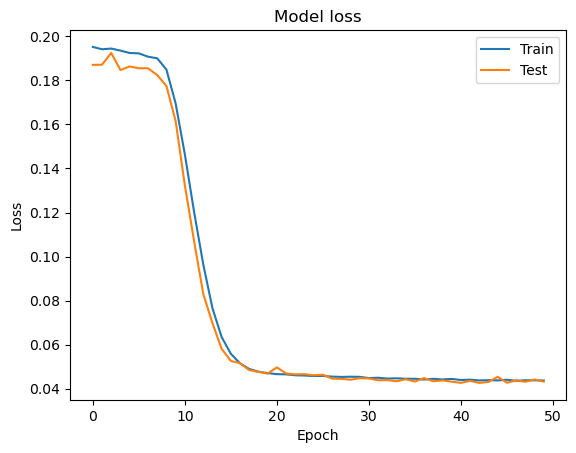

In [108]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


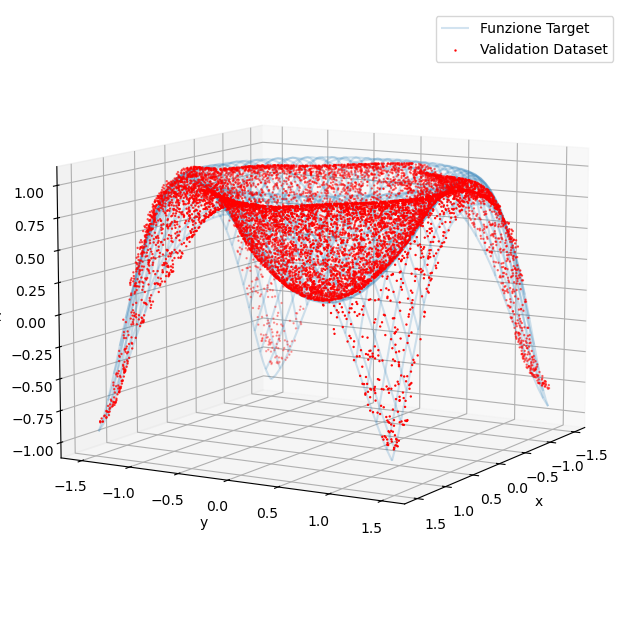

In [115]:
# Generate predicted data
x_predicted = np.random.uniform(-1.5, 1.5, 10000)
y_predicted = np.random.uniform(-1.5, 1.5, 10000)
XY_predicted = np.column_stack((x_predicted, y_predicted))
z_predicted = model.predict(XY_predicted)

fig = plt.figure(figsize = (6, 6))
ax = Axes3D(fig)
fig.add_axes(ax)
ax.plot_wireframe(  X_surf, Y_surf, f(X_surf,Y_surf), label = 'Funzione Target', alpha = 0.2)
ax.scatter(x_predicted, y_predicted, z_predicted, marker = ".", color = "r", label = 'Validation Dataset', s=2)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.legend()
ax.view_init(10, 30)
plt.show()

Per ottimizzare questo modello ho dovuto aumentare di molto il numero di dati di input e validation, penso per la maggiore complessità della funzione, ed utilizzare una funzione di attivazione che assumesse anche valori negativi per fittare bene la mia funzione che assume valori compresi tra -1 e 1.


Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>